<a href="https://colab.research.google.com/github/mamendl/Affirmations/blob/master/practica5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 5: Aprendizaje supervisado

Objetivos de la práctica:
* Conocer cómo funcionan los algoritmos de clasificación de la librería sklearn.
* Estudiar un problema de clasificación binaria.
* Estudiar un problema de clasificación múltiple



## Clasificación binaria

Para el problema de la clasificación binaria vamos a utilizar el dataset pima-indians-diabetes.csv. Este dataset es utilizado de manera habitual en aprendizaje automático. El dataset describe datos médicos de pacientes y si tuvieron diabetes en los 5 años siguientes. En concreto cada fila del dataset representa un
paciente. Cada fila consta de 9 valores numéricos separados por comas, los 8 primeros valores son los descriptores que dan información sobre:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

El ultimo valor de la fila es siempre o bien un 1 o un 0 dependiendo de si el
paciente tuvo diabetes o no.

### Paso 0: Carga de datos

Comenzamos descargando el dataset.

In [1]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/pima-indians-diabetes.csv -O pima-indians-diabetes.csv

--2024-03-13 14:58:28--  https://raw.githubusercontent.com/IA1819/Datasets/master/pima-indians-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23279 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2024-03-13 14:58:28 (15.7 MB/s) - ‘pima-indians-diabetes.csv’ saved [23279/23279]



Cargamos los datos del fichero pima-indians-diabetes.csv utilizando la librería pandas y  almacenamos los vectores de descriptores en una variable X y las etiquetas en una variable Y. Notar que como el dataset no contiene una cabecera estamos usando el atributo `header=None`.

In [40]:
import pandas as pd
df = pd.read_csv('pima-indians-diabetes.csv',header=None)
X =  df.values[:,:-1]
Y =  df.values[:,-1]

En esta práctica no hay tests, pero al ejecutar la siguiente celda deberías obtener los siguientes valores para las distintas variables.

|expresión|resultado|
|---|---|
|Longitud X|768|
|X[4]|[  0.    137.     40.     35.    168.     43.1     2.288  33.   ]|
|Y[11]|1.0|
|Y[50]|0.0|

In [41]:
print("Longitud X:")
print(len(X))
print("X[4]:")
print(X[4])
print("Y[11]:")
print(Y[11])
print("Y[50]:")
print(Y[50])

Longitud X:
768
X[4]:
[  0.    137.     40.     35.    168.     43.1     2.288  33.   ]
Y[11]:
1.0
Y[50]:
0.0


### Paso 1: Partición de conjunto de entrenamiento y de test

Como vimos en clase es muy importante separar el conjunto de instancias en dos grupos: el conjunto de entrenamiento y el conjunto de test. Para ello, podemos utilizar la función ```train_test_split``` de la librería ```sklearn```.

In [4]:
from sklearn.model_selection import train_test_split

A la función train_test_split le vamos a pasar 4 parámetros:

 - las instancias de nuestro dataset (sin etiqueta), es decir X,
 - las etiquetas (es decir Y),
 - el porcentage del dataset que se utilizará para el conjunto de test
   (en este caso 0.25).
 - el estado aleatorio: un número para poder reproducir los resultados.

El resultado devuelto por la función es una tupla de 4 elementos que
contiene el conjunto de entrenamiento, el conjunto de test, las etiquetas
del conjunto de entrenamiento y las etiquetas del conjunto de test.

In [42]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.25, random_state=42)

##### Ejercicio

Modifica a continuación la llamada anterior a la función train_test_split para que el conjunto de testing sea un 10% del total utilizando el mismo random_state que antes.

In [43]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.1, random_state=42)

Si has hecho correctamente la división deberías obtener los siguientes resultados al evaluar la siguiente celda.

|Expresión|Resultado|
|---|---|
|trainLabels[9]|1|
|testLabels[26]| 0|
|trainData[21]|[   0   ,  177   ,  60  ,  29   ,    222  ,   34  ,   1,   21   ]|
|testData[11]|[ 7.00e+00, 1.79e+02 ,9.50e+01, 3.10e+01 ,0.00e+00 ,3.42e+01 ,1.64e-01 ,6.00e+01]|

In [44]:
print("trainLabels[9]")
print(trainLabels[9])
print("testLabels[26]")
print(testLabels[26])
print("trainData[21]")
print(trainData[21].astype("uint8"))
print("testData[11]")
print(testData[11])

trainLabels[9]
1.0
testLabels[26]
0.0
trainData[21]
[  0 177  60  29 222  34   1  21]
testData[11]
[7.00e+00 1.79e+02 9.50e+01 3.10e+01 0.00e+00 3.42e+01 1.64e-01 6.00e+01]


### Paso 2: Entrenando distintos algoritmos

A continuación veremos como entrenar los algoritmos de clasificación vistos
en clase. La ventaja de los clasificadores implementados en ```sklearn``` es que
todos ellos están implementados como clases que heredan de una clase
llamada ```ClassifierMixin```, por lo que el proceso para entrenarlos y probarlos
va a ser siempre el mismo. Además tiene la ventaja de que podremos cambiar
de clasificador de manera muy sencilla.

Como veremos el proceso para usar los clasificadores va a constar de los
siguientes pasos: 1) Crear una instancia del clasificador que vamos a utilizar
(este paso depende claramente del clasificador), 2) entrenarlo mediante el
método ```fit``` de la clase ```ClassifierMixin```, y 3) hacer predicciones mediante
el método ```predict``` de la clase.

#### KNN

Empezamos por el clasificador más sencillo de todos, el KNN. Lo primero que hacemos es importar el clasificador

In [9]:
from sklearn.neighbors import KNeighborsClassifier

Construimos una instancia del clasificador utilizando 5 vecinos

In [10]:
modelKNN = KNeighborsClassifier(n_neighbors=5)

Entrenamos el clasificador pasándole el conjunto de entrenamiento y las etiquetas.

In [11]:
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier()

Una vez que el modelo está entrenado, podemos hacer predicciones con las instancias del conjunto de test

In [12]:
modelKNN.predict(testData[0].reshape(1,-1))

array([0.])

Notad que también podemos hacer predicciones sobre todo el conjunto de test.

In [13]:
modelKNN.predict(testData)

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1.])

##### Ejercicio

¿Qué clase devuelve este clasficador para la decima instancia del conjunto de test?

In [14]:
modelKNN.predict(testData)[10]

0.0

##### Ejercicio

¿Cuántas predicciones cambian si pasamos de 5 a 7 vecinos? Añade todas las celdas que necesites a continuación.

In [15]:
modelKNN = KNeighborsClassifier(n_neighbors=7)

In [16]:
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=7)

In [17]:
modelKNN.predict(testData[0].reshape(1,-1))

array([0.])

In [18]:
modelKNN.predict(testData)

array([0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1.])

In [19]:
modelKNN.predict(testData)[10]

0.0

#### Árboles de decisión

Veámos ahora como utilizar los árboles de decisión, veremos que el proceso es exactamente el mismo que antes. Comenzamos importando el clasificador.

In [20]:
from sklearn.tree import DecisionTreeClassifier

Inicializamos el modelo con un estado aleatorio

In [21]:
modelArbol = DecisionTreeClassifier(random_state=84)

Entrenamos el clasificador pásandole el conjunto de entrenamiento y las etiquetas.

In [22]:
modelArbol.fit(trainData, trainLabels)

DecisionTreeClassifier(random_state=84)

Una vez que el modelo está entrenado, podemos hacer predicciones con las instancias del conjunto de test

In [23]:
modelArbol.predict(testData[1].reshape(1,-1))

array([0.])

Notad que podemos hacer predicciones individuales o sobre todo el conjunto.

In [24]:
modelArbol.predict(testData)

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0.])

Como comentamos en teoría una de las ventajas de los árboles de decisión es que se pueden visualizar, para ello se usan los siguientes comandos. Lo primero que hacemos es exportar el árbol en formato DOT.

In [25]:
from sklearn.tree import export_graphviz
export_graphviz(modelArbol,out_file='tree.dot')

El formato DOT no se puede visualizar directamente, así que es necesario convertir el fichero a png. Para ello se puede usar el siguiente comando (el ! inicial indica que es una instrucción del sistema, así que posiblemente solo funcione en Linux).

In [26]:
!dot -Tpng tree.dot -o tree.png

Por último mostramos el árbol.

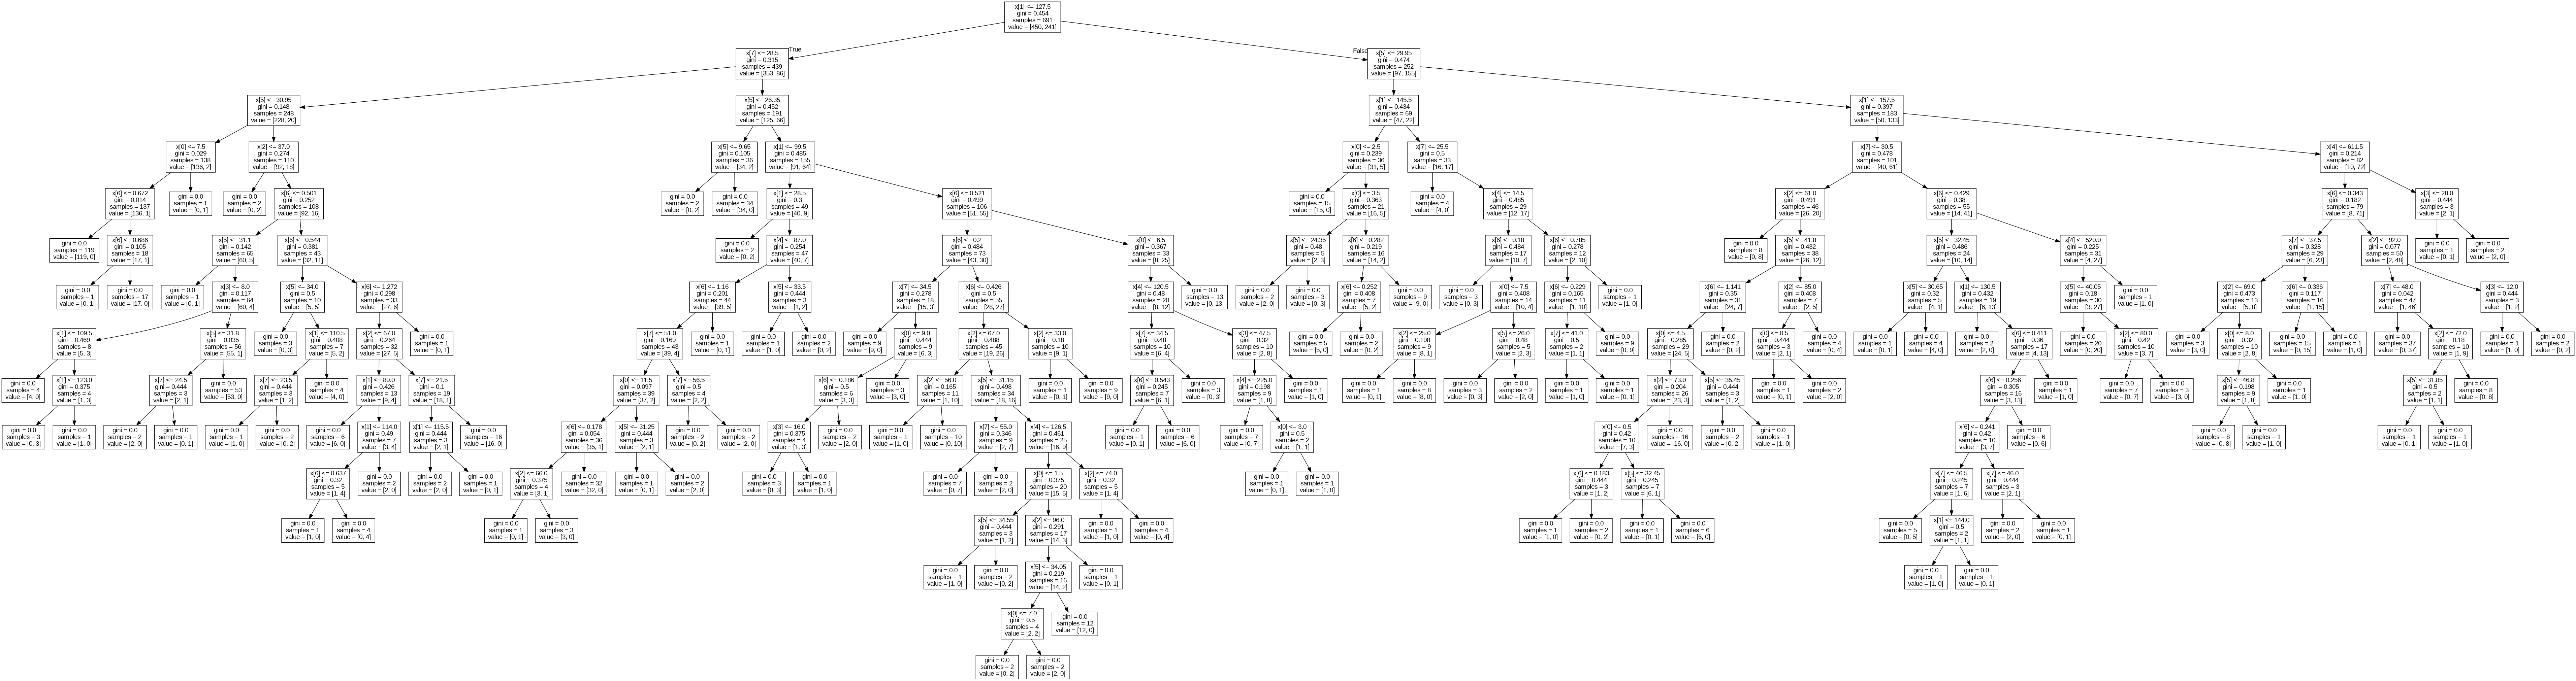

In [27]:
from IPython.display import Image
Image("tree.png")

Cada nodo del árbol (exceptuando los nodos hoja) consta de cuatro valores:
- X[?1]<=?2 --> Indica la feature que se comprueba en ese nodo, si la               feature ?1 de una instancia cumple que es menor o igual que               el valor ?2, entonces va al subárbol izquierdo, de lo contrario               va al subárbol derecho.
- gini = ? --> Índice de ganancia de Gini: coeficiente utilizado para hacer la              partición del dataset.
- samples = ? --> Número de instancias del conjunto de entrenamiento que llegan                 hasta ese nodo.
- value = [?1,?2] --> ?1 es el número de instancias de la clase 1, y ?2 es el                     número de instancias de la clase 2. En los nodos hojas                     uno de ellos siempre será 0.

##### Ejercicio

¿Qué clase devuelve este clasificador para la decima instancia del conjunto de test?

In [28]:
modelArbol.predict(testData)[10]

0.0

##### Ejercicio

¿Cuál es la primera condición que se comprueba en el árbol?

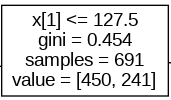

Comprobaría que el nivel de glucosa en sangre es menor o igual a 127.5 (columna 1).

In [34]:
modelArbol.n_features_in_
#modelArbol.feature_importances_

8

##### Ejercicio
Determina la clase que predeciría el árbol de decisión construido anteriormente para una persona con las siguientes características:
 - Glucosa: 100
 - Edad: 32
 - BMI: 4.3

In [54]:
'''
0.Number of times pregnant
1.Plasma glucose concentration a 2 hours in an oral glucose tolerance test
2.Diastolic blood pressure (mm Hg)
3.Triceps skin fold thickness (mm)
4.2-Hour serum insulin (mu U/ml)
5.Body mass index (weight in kg/(height in m)^2)
6.Diabetes pedigree function
7.Age (years)
8.Diabetes o no'''
#1, 7, 5
modelArbol.predict([[0,100,0,0,0,4.3,0,32]])

array([1.])

#### Regresión logística

Pasamos ahora a la regresión logística, veremos que el proceso es el mismo que para los clasificadores anteriores.

In [ ]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state=84)

Entrenamos el clasificador pasándole el conjunto de entrenamiento y las etiquetas.

In [ ]:
modelLR.fit(trainData, trainLabels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=84)

Una vez que el modelo está entrenado, podemos hacer predicciones con las instancias del conjunto de test

In [ ]:
modelLR.predict(testData[1].reshape(1,-1))

array([0.])

In [ ]:
modelLR.predict(testData)

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0.])

##### Ejercicio

¿Qué clase devuelve este clasificador para la 10 instancia del conjunto de test?

In [ ]:
modelLR.predict(testData)[10]

0.0

#### SVMs

En este caso veremos como utilizar el SVM con un kernel lineal.

In [ ]:
from sklearn.svm import SVC
modelSVMLineal = SVC(kernel="linear")
modelSVMLineal.fit(trainData, trainLabels)
modelSVMLineal.predict(testData)

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0.])

##### Ejercicio

Busca en la documentación de sklearn como definir un modelo SVM que utilice un kernel sigmoide con gamma igual a 2 y coef0 igual a 1. Define dicho modelo, almacenalo en la variable modelSVMSigmoide, entrenalo, y utilizalo para predecir las clases de todas las instancias del conjunto de test.

In [ ]:
modelSVMSigmoid = SVC(kernel="sigmoid", gamma=2, coef0=1)
modelSVMSigmoid.fit(trainData, trainLabels)
modelSVMSigmoid.predict(testData)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Redes neuronales

Como vimos en teoría el Perceptron es el tipo de red neuronal más sencillo. A continuación vamos a definir un modelo que usa el algoritmo de Perceptron con ratio de aprendizaje de 1.0 y los datos pasarán 10 veces por el.

In [ ]:
from sklearn.linear_model import Perceptron
modelPerceptron = Perceptron(max_iter=10,eta0=1.0,random_state=84)
modelPerceptron.fit(trainData,trainLabels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(max_iter=10, random_state=84)

Veámos como construir un Perceptron multicapa con dos capas ocultas, la primera con 5 unidades y la segunda con 2 unidades, con ratio de aprendizaje 0.01, momento 0.9.

In [ ]:
from sklearn.neural_network import MLPClassifier
modelMultiLayerPerceptron = MLPClassifier(hidden_layer_sizes=(5,2),learning_rate_init=0.01,momentum=0.9)
modelMultiLayerPerceptron.fit(trainData,trainLabels)

MLPClassifier(hidden_layer_sizes=(5, 2), learning_rate_init=0.01)

##### Ejercicio
Crear un Perceptron multicapa con una capa oculta con tres unidades, entrenarlo y almacenalo en una variable llamada ```modelMultiLayerPerceptron2```.

In [ ]:
modelMultiLayerPerceptron2 = MLPClassifier(hidden_layer_sizes=(3),learning_rate_init=0.01,momentum=0.9)
modelMultiLayerPerceptron2.fit(trainData,trainLabels)

MLPClassifier(hidden_layer_sizes=3, learning_rate_init=0.01)

##### Ejercicio

Aunque en esta práctica no vamos hacer una evaluación completa de los algoritmos vamos a dar un primer paso para ver cuál de los modelos es el que funciona mejor. Para ello vamos a definir una función que tomará un clasificador ya entrenado, un conjunto de test y las etiquetas de dicho conjunto, y devuelva el número de instancias del conjunto de test que son clasificadas de manera correcta por el clasificador dado.

In [ ]:
def evalua(clasificador,testData=testData,testLabels=testLabels):
    prediccion = clasificador.predict(testData)
    correctas = 0
    for i,z in zip(prediccion, testLabels):
      if (i == z):
        correctas += 1
    return correctas

##### Ejercicio
¿Qué modelo de los que hemos definido hasta el momento clasifica más instancias de manera correcta?

In [ ]:
evalua(modelKNN)

52

In [ ]:
evalua(modelArbol)

58

In [ ]:
evalua(modelSVMLineal)

54

In [ ]:
evalua(modelSVMSigmoid)

50

In [ ]:
evalua(modelMultiLayerPerceptron)

50

In [ ]:
evalua(modelMultiLayerPerceptron2)

54

El modelo que usa el algoritmo del árbol de decisión.

## Clasificación múltiple

Pasamos ahora a ver un ejemplo de clasificación múltiple. Para ello utilizaremos el dataset [palmerpenguins](https://github.com/allisonhorst/palmerpenguins/) que es una alternativa al dataset de iris y que se centra en clasificar clases de pingüinos a partir de tres rasgos.



![Clases](https://allisonhorst.github.io/palmerpenguins/logo.png)



### Paso 0: carga de datos

Descargamos el dataset de palmerpenguins.

El fichero cuenta con las siguientes columnas:
- rowid: identificador de columnna.
- species: la clase a predecir (adelie, chinstrap, o gentoo).
- island: la isla en la cuál fue encontrada la especie.
- bill_length_mm: longitud del pico.
- bill_depth_mm: ancho del pico.
- fliper_length_mm: longitud del ala.
- fliper_depth_mm: ancho del ala.
- body_mass_g: masa corporal.
- sex: sexo.
- year: año en el que fue tomada la muestra.  

In [ ]:
!wget https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv -O penguins.csv

--2024-03-11 15:22:41--  https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19263 (19K) [text/plain]
Saving to: ‘penguins.csv’

penguins.csv        100%[===================>]  18.81K  --.-KB/s    in 0.005s  

2024-03-11 15:22:42 (3.96 MB/s) - ‘penguins.csv’ saved [19263/19263]



A continuación podemos cargar el fichero. Notar que algunas de las filas contienen valores nulos, por lo que las eliminaremos con la función ``dropna`` de pandas.

In [ ]:
df = pd.read_csv('penguins.csv')
df.dropna(inplace=True)

##### Ejercicio

Almacena los vectores de descriptores en una variable Xpenguins y las etiquetas en una variable Ypenguins. Al igual que antes, los valores de Xpenguins (los descriptores bill_length_mm, bill_depth_mm, fliper_length_mm, fliper_length_mm y sex),  e Ypenguins (la variable species) deben ser cambiados por los valores adecuados.

In [ ]:
Xpenguins = df.values[:,3:8]
Ypenguins = df.values[:,1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


Si se definen de manera correcta Xpenguins e Ypenguins, deberías obtener los siguientes resultados al evaluar la celda siguiente.

| Expresión | Resultado |
| --- | --- |
|len(Xpenguins) | 333|
|Xpenguins[4] | [39.3 20.6 190.0 3650.0 'male'] |
|Ypenguins[10] | Adelie |
|Ypenguins[50] | Chinstrap |

In [ ]:
print(len(Xpenguins))
print(Xpenguins[4])
print(Ypenguins[10])
print(Ypenguins[300])

333
[39.3 20.6 190.0 3650.0 'male']
Adelie
Chinstrap


### Paso 1: partición de conjunto de entrenamiento y de test

##### Ejercicio
Utilizando la función train_test_split parte el conjunto de penguins en dos conjuntos (entrenamiento y test) usando un 25% para test y utilizando como estado aleatorio el valor 42. El resultado lo almacenaras en las variables trainPenguinsData, testPenguinsData, trainPenguinsLabels y testPenguinsLabels.

In [ ]:
(trainPenguinsData, testPenguinsData, trainPenguinsLabels, testPenguinsLabels) = train_test_split(Xpenguins,Ypenguins,test_size=0.25, random_state=42)

Si evalúas la celda siguiente los resultados que deberías obtener son los siguientes.

| Expresión | Resultado |
|---|---|
|trainPenguinsLabels[8]| Adelie |
|testPenguinsLabels[25]| Adelie |
|trainPenguinsData[20]| [47.3 15.3 222.0 5250.0 'male'] |
|testPenguinsData[10] | [42.9 17.6 196.0 4700.0 'male'] |

In [ ]:
print(trainPenguinsLabels[8])
print(testPenguinsLabels[25])
print(trainPenguinsData[20])
print(testPenguinsData[10])

Adelie
Adelie
[47.3 15.3 222.0 5250.0 'male']
[42.9 17.6 196.0 4700.0 'male']


Como tenemos una columna que no es numérica, será necesario transformarla utilizando la aproximación one-hot encoding. Esta aproximación asigna un índice a cada una de las alternativas posibles, genera un vector de longitud el tamaño de alternativas  formado por todo ceros salvo en la posición del índice de la alternativa que toma el valor uno. Esta funcionalidad viene implementada en sklearn mediante el operador ``OneHotEncoder``.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

A continuación definimos el codificador. Le indicamos que si la categoría es desconocida, lo indique como una nueva clase.

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

Ahora podemos transformar los datos de la columna ``sex``. Notar que para el conjunto de entrenamiento usamos la función ``fit_transform`` que entrena el codificador y lo usa para transformar los datos del conjunto de entrenamiento, mientras la función ``transform`` se utiliza solo cuando el codificador ya está construido y se aplica al conjunto de test.

In [ ]:
sexoCodificadoTrain = enc.fit_transform(trainPenguinsData[:,-1].reshape(-1, 1))
sexoCodificadoTest = enc.transform(testPenguinsData[:,-1].reshape(-1,1))

Volvemos a unir los datos que habíamos separado previamente y ya podemos usar estos datos para entrenar los modelos.

In [ ]:
import numpy as np
trainPenguinsData = np.concatenate((trainPenguinsData[:,:-1],sexoCodificadoTrain.toarray()),axis=1)
testPenguinsData = np.concatenate((testPenguinsData[:,:-1],sexoCodificadoTest.toarray()),axis=1)

### Paso 2: entrenando distintos algoritmos

Como vimos en clase hay algunos algoritmos que están pensados para trabajar
en el contexto de clasificación binaria (Regresión Logística y SVM). Para estos algoritmos la librería usa la estrategia uno-contra-uno en el caso de SVM y la estrategia uno-contra-todos en el caso de regresión logística, pero no hay que hacer ninguna modificación a la hora de trabajar con ellos. Otros algoritmos pueden trabajar con su formulación original en el caso
de clasificación múltiple (Knn, Árboles de decisión y las redes neuronales). Así que podemos trabajar con los clasificadores como hemos visto hasta ahora.

##### Ejercicio

Inicializar y entrenar los siguientes clasificadores con el dataset de penguins:
 - Knn con 5 vecinos (almacenarlo en la variable modelPenguinsKnn)
 - Árbol de decisión con estado aleatorio 84 (almacenarlo en modelPenguinsArbol).
 - Regresión logística (almacenarlo en la variable modelPenguinsRL).
 - SVM con kernel lineal (almacenarlo en la variable modelPenguinsSVMLineal).
 - SVM con kernel sigmoide gamma=2, r=1 (almacenarlo en la variable
   modelPenguinsSVMSigmoide).
 - Perceptron con ratio de aprendizaje de 1.0 y número de iteraciones 10
   (almacenarlo en la variable modelPenguinsPerceptron).
 - Perceptron multicapa con dos capas ocultas, una de 5 y otra de 2 unidades
   (almacenarlo en la variable modelPenguinsMultiLayerPerceptron).


In [ ]:
modelPenguinsKNN = KNeighborsClassifier(n_neighbors=5)
modelPenguinsArbol= DecisionTreeClassifier(random_state=84)
modelPenguinsLR= LogisticRegression(random_state=84)
modelPenguinsSVMLineal= SVC(kernel="linear")
modelPenguinsSVMSigmoide = SVC(kernel="sigmoid", gamma=2, coef0=1)
modelPenguinsPerceptron= MLPClassifier(hidden_layer_sizes=(3),learning_rate_init=0.01,momentum=0.9)
modelPenguinsMultiLayerPerceptron= MLPClassifier(hidden_layer_sizes=(3),learning_rate_init=0.01,momentum=0.9)

modelPenguinsKNN.fit(trainPenguinsData,trainPenguinsLabels)
modelPenguinsArbol.fit(trainPenguinsData,trainPenguinsLabels)
modelPenguinsLR.fit(trainPenguinsData,trainPenguinsLabels)
modelPenguinsSVMLineal.fit(trainPenguinsData,trainPenguinsLabels)
modelPenguinsSVMSigmoide.fit(trainPenguinsData,trainPenguinsLabels)
modelPenguinsPerceptron.fit(trainPenguinsData,trainPenguinsLabels)
modelPenguinsMultiLayerPerceptron.fit(trainPenguinsData,trainPenguinsLabels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier(hidden_layer_sizes=3, learning_rate_init=0.01)

##### Ejercicio

Utilizando la función evalua definida anteriormente ¿Qué modelo clasifica más instancias de manera correcta en el problema de penguins?

In [ ]:
def evalua_penguins(clasificador,testData=testPenguinsData,testLabels=testPenguinsLabels):
    prediccion = clasificador.predict(testData)
    correctas = 0
    for i,z in zip(prediccion, testLabels):
      if (i == z):
        correctas += 1
    return correctas

In [ ]:
evalua_penguins(modelPenguinsKNN)

63

In [ ]:
evalua_penguins(modelPenguinsArbol)

83

In [ ]:
evalua_penguins(modelPenguinsLR)

83

In [ ]:
evalua_penguins(modelPenguinsSVMLineal)

83

In [ ]:
evalua_penguins(modelPenguinsSVMSigmoide)

40

In [ ]:
evalua_penguins(modelPenguinsPerceptron)

40

In [ ]:
evalua_penguins(modelPenguinsMultiLayerPerceptron)

40

## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.